<h1><center>Anderson Cancer Center - Identifying Key Variables for Donor Funding using PCA<center><h1>


<img src="files/images/logo.svg">

### 1. Introduction

#### a).Objective
The objective of this task is to develop a model to address the growing number of referrals at the Anderson Cancer Center. The model's first step is to identify essential variables for securing donor funding. Principal Component Analysis (PCA) has been chosen as the most suitable technique for this task. The following tasks will be implemented:
- PCA Implementation:

Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets.

- Dimensionality Reduction:

Reduce the dataset into 2 PCA components for the project.

- Implement logistic regression for prediction.

Implement a logistic regression for a defined prediction on the dataset.

#### b). Background
Over the past few months, the number of referral cases at the Anderson Cancer Center has been growing rapidly. In order to provide a comprehensive and integrated health service for the people,the center has identified the need for using data to diagnose this growth, and to communicate the findings to simulate donor funding. This study aims to develop a model that will aid the center in addressing the growing number of referrals and identify the key variables that will appeal to donor funding.

#### c). An Overview of PCA
Principal Component Analysis (PCA) is a dimensionality reduction technique that is used to reduce the number of dimensions in a large dataset while retaining the original information. The "Curse of Dimensionality" is a common problem in machine learning. Many dimensions in a dataset often lead to overfitting (where a model fits too closely) and or multicollinearity (where variables are related, affecting model performance). PCA irons out these problems by extracting the most informative features from large datasets while preserving the most relevant information from the initial dataset (https://www.ibm.com/topics/principal-component-analysis).

This statistical technique involves both linear algebra and matrix operations, and it transforms the original dataset into a new coordinate system that is structured by the principal components. The eigenvectors and eigenvalues from the covariance matrix that underpin the principal components allow for the analysis of these linear transformations.
<img src="files/images/pca.png">
Figure: Illustration of PCA. (Source: IBM)

### 2. Data Exploration
We will be using the cancer dataset available from sklearn.datasets. We start by downloading the dataset.

In [18]:
# Import the required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the breast cancer dataset from sklearn
cancer_data = load_breast_cancer()

# We print the description of the dataset to understand the dataset.
print(cancer_data['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We then create a dataframe from the cancer dataset.

In [21]:
cancer_df = pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
#(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The breast cancer dataset has 30 columns and 569 rows. The dataset characteristics are defined as:

Source (https://scikit-learn.org/1.5/datasets/toy_dataset.html#breast-cancer-dataset)

- Number of Instances: 569

- Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension (“coastline approximation” - 1)

The target column indicates whether the case is malignant (0) or benign (1). Benign tumors are noncancerous, while malignant tumors are cancerous.

### 3. Data Cleaning and Preprocessing

##### Check Missing Value
From the description of the dataset, there are no missing values. We confirm this using the pandas *isnull()* function

In [22]:
# Check if the dataset has missing values
cancer_df.isnull().values.any()

False

##### Summary Statitistics
We can check the summary statistics for the dataset

In [23]:
# Get the Summary statistics
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##### Feature Scaling

As we have seen, there are 30 features in our dataset. Visualizing all features(dimensions) at once will be difficult. Subsequently, we will apply PCA to identify 2 principle components to visualize the data in a 2D space.
We therefore need to scale or normalize the data so that the features will have a single unit variance.
Scaling data allows us to transform the data into a new scale without changing the shape of the distribution. It is useful for data that has a wide range of measurements. We will use the Standardscaler class from the sklearn module.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_df)
scaled_data =scaler.transform(cancer_df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 4. Principal Component Analysis (PCA)

Next, we apply the fit on the scaled data and transform this data into 2 principal components.

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Then we create a new transformed dataset with the reduced dimensions.

In [31]:
pca.fit(scaled_data)
PCA(n_components=2)

PCA(n_components=2)

In [32]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


The dimensions have now been reduced from 30 features to 2 features. 

#### Visualizing the Results

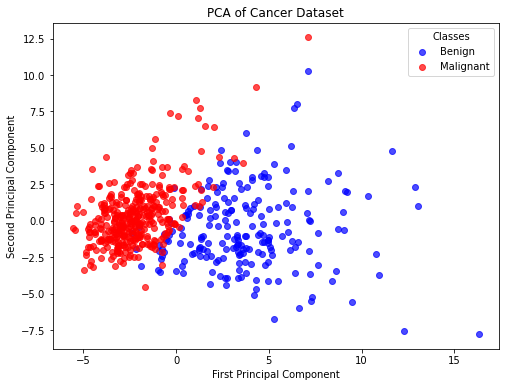

In [41]:
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}
target_names = {0: 'Benign', 1: 'Malignant'}

# Use target values to assign colors
for target_value in colors:
    subset = x_pca[cancer_data['target'] == target_value]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[target_value], label=target_names[target_value], alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Cancer Dataset')
plt.legend(title="Classes")

plt.show()

### 7. Interpretation and Key Variable Identification

From the graph, we have projected the two classes into a 2 dimensional space. The two classes, benign and malignant are now separated. The benign class also appears more spread out than the malignant classes.

### 8. Implementing a Logistic Regression

Logistic regression is a supervised algorithim that can be used to estimate the propability of an event occurring, such as whether a cancer is benign or malignant, based on a set of independent variables. We will implement a logistics regression that predicts whether a cancer is benign or malignant.

In [44]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, cancer_data['target'], test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.99
Confusion Matrix:
[[42  1]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### 9. Conclusion and Next Steps

There is exists more dimensionality reduction techniques such as the t-distributed Stochastic Neighbor Embedding(tSNE), which, as opposed to PCA, is a non-linear probabilistic dimensionality reduction technique. This can be explored for the same dataset.